In [1]:
import numpy as np
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
import phate
import pandas as pd

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [4]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)  # Build the neighborhood graph
sc.tl.diffmap(adata)
adata.uns['iroot'] = np.argmax(adata.obsm['X_phate'][adata.obs['day'] == 0, 0])
sc.tl.dpt(adata)

<Axes: >

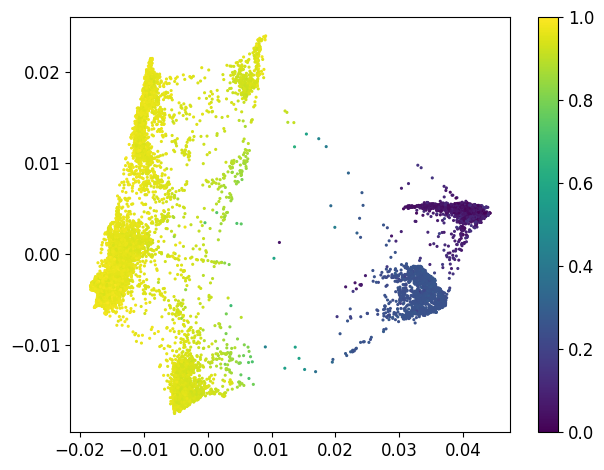

In [19]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['dpt_pseudotime'], cmap='viridis')

<Axes: >

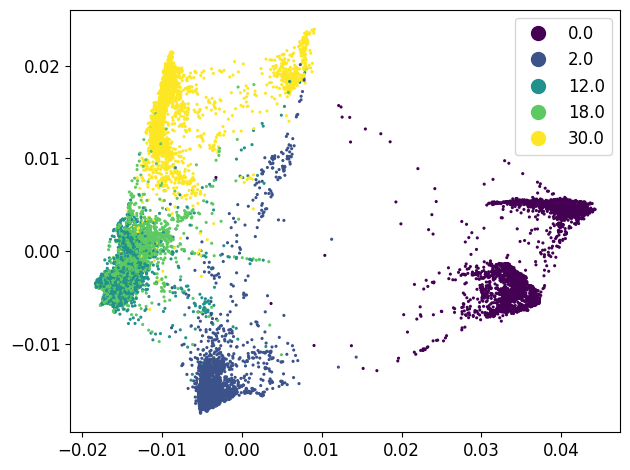

In [20]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['day'], cmap='viridis')

In [21]:
adata_subset = adata[adata.obs['day'] >0.]

In [22]:
sc.pp.neighbors(adata_subset, n_neighbors=15, n_pcs=30)  # Build the neighborhood graph
sc.tl.diffmap(adata_subset)
adata_subset.uns['iroot'] = np.argmin(adata_subset.obsm['X_phate'][:, 1])
sc.tl.dpt(adata_subset)

<Axes: >

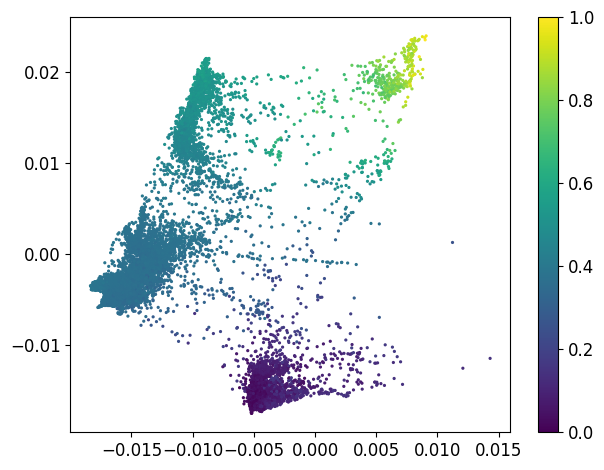

In [23]:
scprep.plot.scatter2d(adata_subset.obsm['X_phate'], adata_subset.obs['dpt_pseudotime'], cmap='viridis')

In [51]:
bins = pd.qcut(adata_subset.obs['dpt_pseudotime'], q=5, labels=[0,1,2,3,4])
# bins = pd.qcut(adata_subset.obs['dpt_pseudotime'], q=4, labels=[0,1,2,3])

<Axes: >

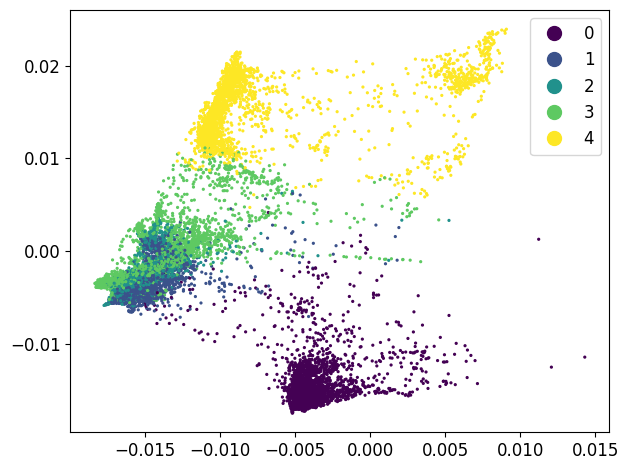

In [54]:
scprep.plot.scatter2d(adata_subset.obsm['X_phate'], bins, cmap='viridis')

In [30]:
adata_subset.obs['bin'] = bins.astype(int)
adata.obs['bin'] = 0.
adata.obs.loc[adata_subset.obs_names, 'bin'] = adata_subset.obs['bin'] + 1

<Axes: >

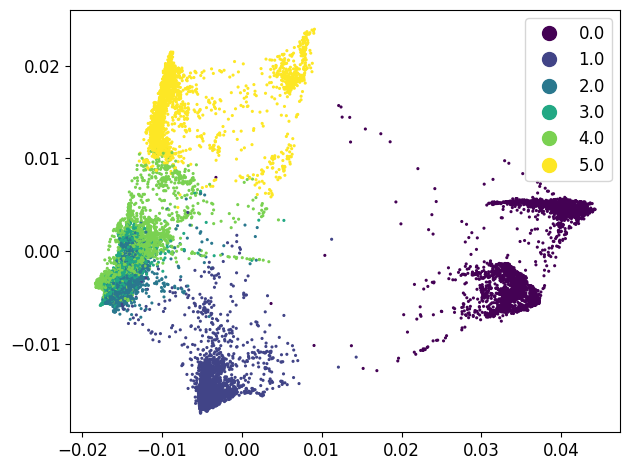

In [31]:
scprep.plot.scatter2d(adata.obsm['X_phate'], adata.obs['bin'], cmap='viridis')

In [33]:
time_dict = {
    0.0: 0,
    2.0: 1,
    12.0: 2,
    18.0: 3,
    30.0: 4,
}
adata.obs['time'] = adata.obs['day'].map(time_dict)


In [34]:
adata.write('../data/pseudotime.h5ad')

In [37]:

mioflow_df = pd.DataFrame(adata.obsm['X_phate'], columns=['d1', 'd2'], index=adata.obs.index)
mioflow_df['samples'] = adata.obs['bin'].values
# mioflow_df['growth'] = np.nan
# mioflow_df.loc[dff.index, 'growth'] = dff['growth1'].clip(upper=2).values
mioflow_df.to_csv(f'../data/mioflow_pseudotime.csv')
